In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv('/workspaces/tutorial/tip_amounts/Dataset/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape

(244, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


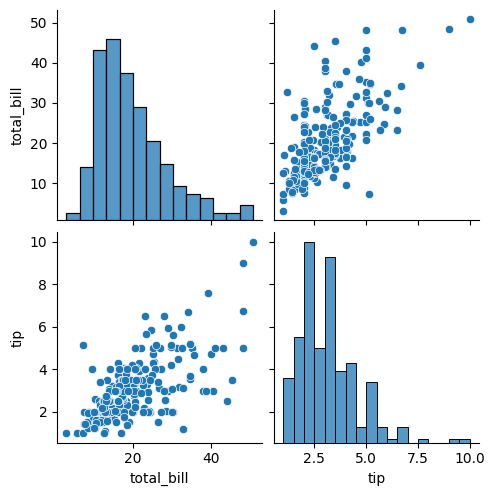

In [6]:
sns.pairplot(df[['total_bill','tip']])

In [7]:
correlation=df[['total_bill','tip','size']].corr()

<Axes: >

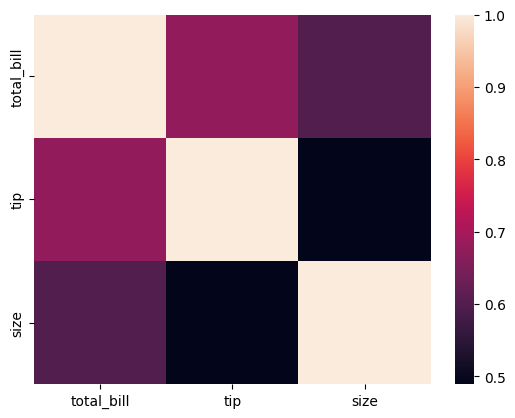

In [8]:
sns.heatmap(correlation)

In [9]:
X = df.drop('tip', axis=1)
y = df['tip']

In [10]:
categorical_cols = ['sex', 'smoker', 'day', 'time']
numerical_cols = ['total_bill', 'size']

In [11]:
sc=StandardScaler()
X[numerical_cols]=sc.fit_transform(X[numerical_cols])

In [12]:
le=LabelEncoder()
for i in categorical_cols:
    X[i]=le.fit_transform(X[i])

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((195, 6), (49, 6), (195,), (49,))

In [15]:
X_train.head()

,total_bill,sex,smoker,day,time,size
85,1.693359,0,0,3,1,1.506958
117,-1.028342,0,0,3,1,-0.600193
83,1.451355,1,1,3,1,-0.600193
206,0.765865,1,1,1,0,0.453383
183,0.380910,1,1,2,0,1.506958


In [16]:
model_performance = {}
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

In [17]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_performance[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    }

In [18]:
model_performance

{'Linear Regression': {'MAE': np.float64(0.6649594300654809),
  'MSE': np.float64(0.7585330566714988),
  'R2': 0.3786533484988066},
 'Ridge Regression': {'MAE': np.float64(0.6649956191006448),
  'MSE': np.float64(0.7553452379660692),
  'R2': 0.38126462622861745},
 'Lasso Regression': {'MAE': np.float64(0.9286153846153847),
  'MSE': np.float64(1.249762542688081),
  'R2': -0.023733592413697657},
 'Decision Tree': {'MAE': np.float64(0.8869387755102043),
  'MSE': np.float64(1.3586857142857145),
  'R2': -0.11295718965553725},
 'Random Forest': {'MAE': np.float64(0.6244979591836732),
  'MSE': np.float64(0.6336109820408158),
  'R2': 0.48098232689687304},
 'Support Vector Regression': {'MAE': np.float64(0.5837631003483986),
  'MSE': np.float64(0.5369761279688648),
  'R2': 0.5601400412084809},
 'K-Nearest Neighbors': {'MAE': np.float64(0.657265306122449),
  'MSE': np.float64(0.6851225306122449),
  'R2': 0.43878702909542233}}

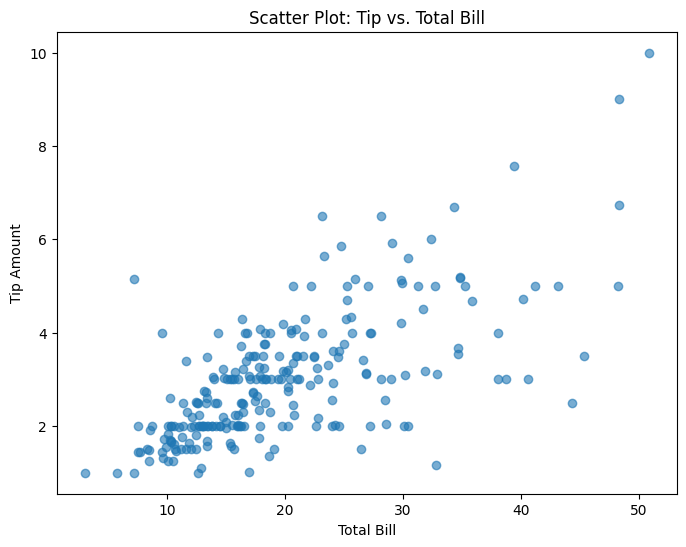

In [19]:
# 1. Scatter Plot: Tip amount vs. Total Bill
plt.figure(figsize=(8, 6))
plt.scatter(df['total_bill'], df['tip'], alpha=0.6)
plt.title('Scatter Plot: Tip vs. Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.show()

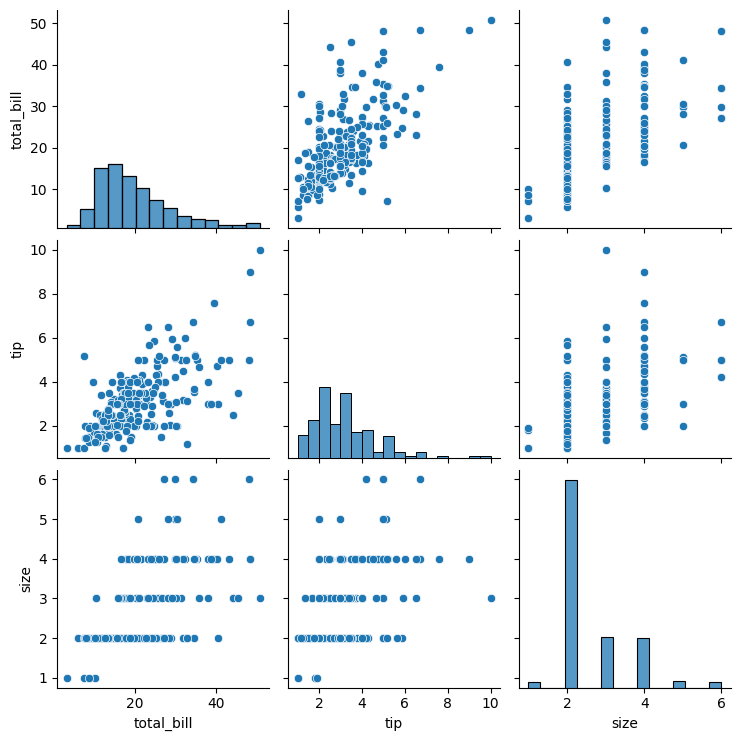

In [20]:
# 2. Pair Plot for multiple features
sns.pairplot(df[['total_bill', 'tip', 'size']])
plt.show()

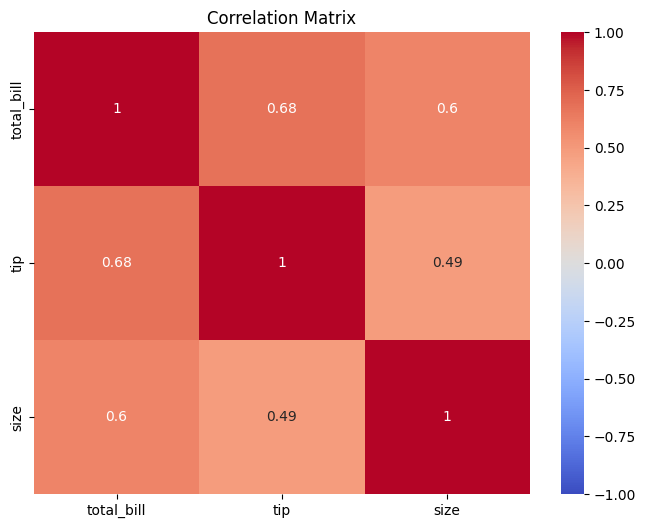

In [22]:
# 3. Correlation Matrix (Heatmap)
plt.figure(figsize=(8, 6))
correlation_matrix = df[['total_bill', 'tip', 'size']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()